# 计算香农信息熵 ：$$ Entropy(S)=\sum_{i=1}^c-p_ilog_{2}{p_i} $$

In [1]:
from math import log

def calcshan(dataset):
    length=len(dataset)
    p={}
    H=0.0
    for data in dataset:
        currentlabel=data[-1]
        if currentlabel not in p.keys():
            p[currentlabel]=0
        p[currentlabel]+=1
        
    for key in p:
        px=float(p[key])/float(length)
        H-=px*log(px,2)
    return H

data=[[1,1,'yes'],[1,1,'yes'],[1,0,'no'],[0,1,'no'],[0,1,'no']]
shannon=calcshan(data)
shannon

0.9709505944546686

# 使用决策树对iris数据集分类

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
import pydotplus
import numpy as np
from IPython.display import Image
import os
os.environ["PATH"] += os.pathsep + 'F:/graphviz-2.38/bin'

iris=load_iris()

In [3]:
#iris

In [4]:
X = iris.data[:, [0, 2]]
y = iris.target
clf=tree.DecisionTreeClassifier()
clf=clf.fit(X,y)

#分类结果及概率
result=clf.predict(iris.data[:1,[0,2]])
result_prob=clf.predict_proba(iris.data[:1,[0,2]])

print("分类结果:",result,"对应的概率:",result_prob)

分类结果: [0] 对应的概率: [[1. 0. 0.]]


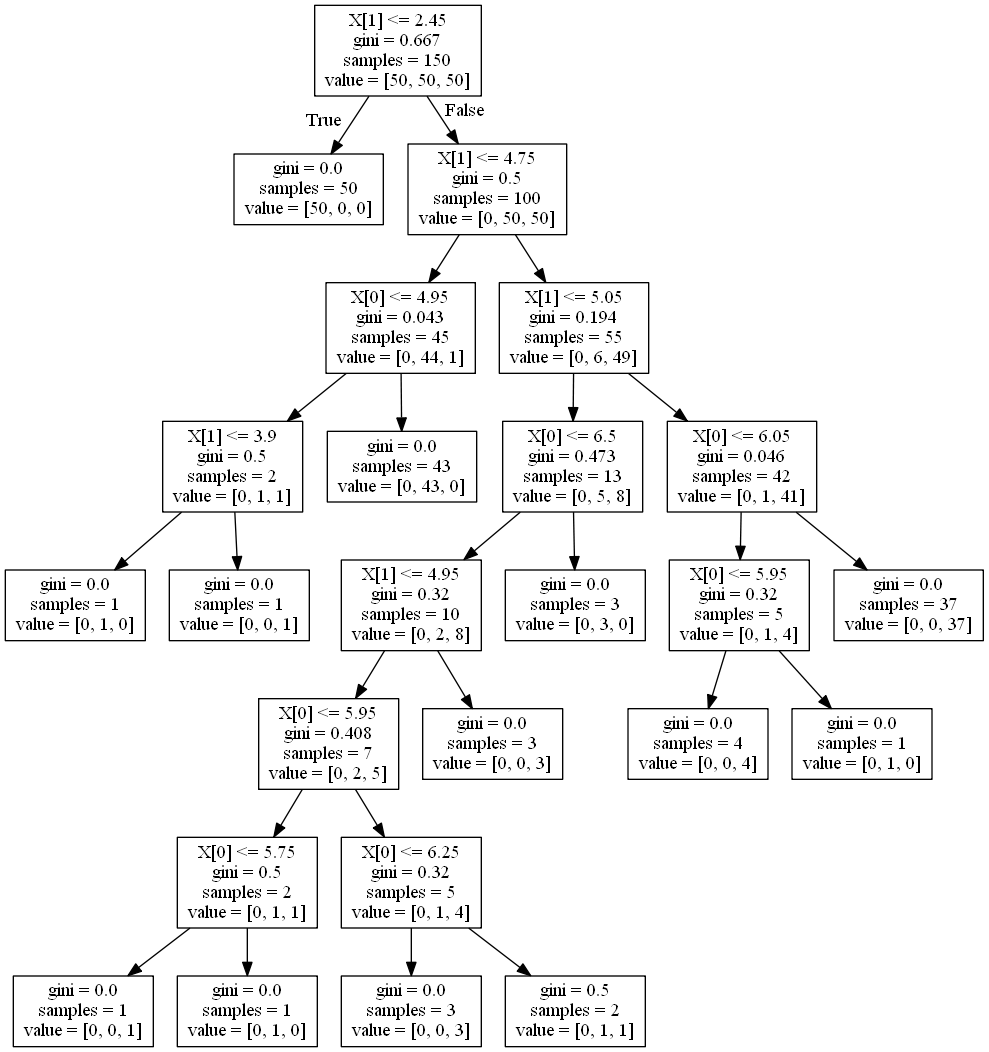

In [5]:
dot_data = tree.export_graphviz(clf, out_file=None)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png('iris.png')    #保存图像
Image(graph.create_png())

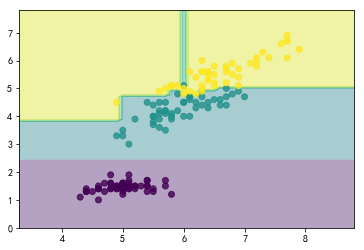

In [6]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])#np.c_按行连接矩阵,注意一维向量默认是列向量
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()                   

# 对身高体重数据使用决策树进行分类

In [7]:
data=[[1.5,50],[1.5,60],[1.6,40],[1.6,60],[1.7,60],[1.7,80],[1.8,60],[1.8,90],[1.9,70],[1.9,80]]
labels=['thin','fat','thin','fat','thin','fat','thin','fat','thin','fat']

In [8]:
import numpy as np
import scipy as sp
from sklearn import tree
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pydotplus

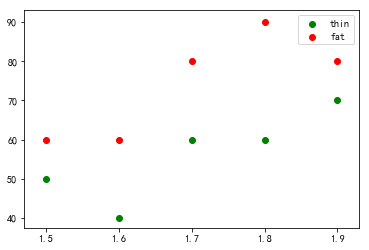

In [9]:
data=np.array(data)
labels=np.array(labels)
y=np.zeros(labels.shape)
y[labels=='fat']=1
y[labels=='thin']=0
height=data[:,0]
weight=data[:,1]


x=np.array([1.5,1.6,1.7,1.8,1.9])
y1=weight[0:-1:2]
y2=weight[1::2]
plt.scatter(x,y1,c='g',label='thin')
plt.scatter(x,y2,c='r',label='fat')
plt.legend()
plt.show()

In [10]:
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.2,random_state=2)

clf=tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)
print('测试数据为:',x_test)
result=clf.predict(x_test)

print("测试集的预测结果为:",result,'\n',"真实测试集标签为:",y_test)

print("不同特征的权重为:",clf.feature_importances_)

测试数据为: [[ 1.7 60. ]
 [ 1.5 60. ]]
测试集的预测结果为: [0. 1.] 
 真实测试集标签为: [0. 1.]
不同特征的权重为: [0.34436094 0.65563906]


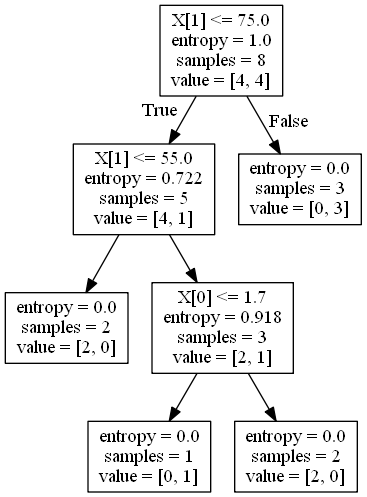

In [11]:
#绘制决策树图
dot_data=tree.export_graphviz(clf,out_file=None)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png("身高体重.png")
Image(graph.create_png())

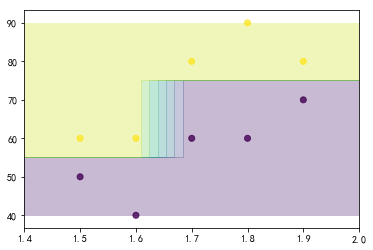

In [12]:
x_min, x_max = height.min()-0.1, height.max()+0.1
y_min, y_max = weight.min(), weight.max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])#np.c_按行连接矩阵,注意一维向量默认是列向量
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(height, weight, c=y, alpha=0.8)
plt.show() 